In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [243]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances_with_fingers.csv')

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_147' 'bien_174' 'bien_230' 'bien_241' 'bien_244' 'bien_269'
 'bien_278' 'bien_329' 'bien_337' 'bien_416' 'comer_146' 'comer_164'
 'comer_313' 'comer_477' 'comer_484' 'comer_489' 'comer_705' 'comer_743'
 'comer_779' 'comer_86' 'cuánto_405' 'cuánto_420' 'cuánto_445'
 'cuánto_448' 'cuánto_456' 'cuánto_483' 'cuánto_706' 'cuánto_708'
 'cuánto_742' 'cuánto_744' 'cómo_12' 'cómo_171' 'cómo_223' 'cómo_230'
 'cómo_387' 'cómo_427' 'cómo_44' 'cómo_85' 'cómo_9' 'cómo_90' 'decir_101'
 'decir_138' 'decir_224' 'decir_265' 'decir_276' 'decir_321' 'decir_433'
 'decir_528' 'decir_755' 'decir_789' 'dentro_369' 'dentro_457'
 'dentro_486' 'dentro_55' 'dentro_566' 'dentro_596' 'dentro_603'
 'dentro_627' 'dentro_692' 'dentro_73' 'emoción_143' 'emoción_145'
 'emoción_249' 'emoción_272' 'emoción_281' 'emoción_43' 'emoción_45'
 'emoción_54' 'emoción_71' 'emoció

In [244]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'bien_147','bien_174','bien_230','bien_241','bien_244','bien_269',
 'bien_278','bien_329','bien_337','bien_416','comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','cuánto_405','cuánto_420','cuánto_445',
 'cuánto_448','cuánto_456','cuánto_483','cuánto_706','cuánto_708',
 'cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_223','cómo_230',
 'cómo_387','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789','dentro_369','dentro_457',
 'dentro_486','dentro_55','dentro_566','dentro_596','dentro_603',
 'dentro_627','dentro_692','dentro_73','emoción_143','emoción_145',
 'emoción_249','emoción_272','emoción_281','emoción_43','emoción_45',
 'emoción_54','emoción_71','emoción_81','ese_100','ese_143','ese_214',
 'ese_385','ese_544','ese_608','ese_638','ese_642','ese_697','ese_719',
 'fuerte_152','fuerte_153','fuerte_240','fuerte_314','fuerte_361',
 'fuerte_362','fuerte_363','fuerte_571','fuerte_584','fuerte_588',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89','sí_200',
 'sí_228','sí_240','sí_251','sí_277','sí_315','sí_37','sí_657','sí_659',
 'sí_76','tú_154','tú_176','tú_263','tú_277','tú_53','tú_635','tú_639',
 'tú_711','tú_778','tú_96','yo_113','yo_121','yo_123','yo_125','yo_152',
 'yo_164','yo_193','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])


In [245]:
temp_10_10inst

temp_10_10inst_w1 = temp_10_10inst[~temp_10_10inst.classes.str.startswith('bien')]
temp_10_10inst_w2 = temp_10_10inst_w1[~temp_10_10inst_w1.classes.str.startswith('cuánto')]
temp_10_10inst_w3 = temp_10_10inst_w2[~temp_10_10inst_w2.classes.str.startswith('cómo')]
temp_10_10inst_w4 = temp_10_10inst_w3[~temp_10_10inst_w3.classes.str.startswith('dentro')]
temp_10_10inst_w5 = temp_10_10inst_w4[~temp_10_10inst_w4.classes.str.startswith('emoción')]
temp_10_10inst_w6 = temp_10_10inst_w5[~temp_10_10inst_w5.classes.str.startswith('fuerte')]
temp_10_10inst_w7 = temp_10_10inst_w6[~temp_10_10inst_w6.classes.str.startswith('sí')]
temp_10_10inst_w8 = temp_10_10inst_w7[~temp_10_10inst_w7.classes.str.startswith('tú')]
temp_10_10inst_w9 = temp_10_10inst_w8[~temp_10_10inst_w8.classes.str.startswith('yo')]
temp_10_10inst_w10 = temp_10_10inst_w9[~temp_10_10inst_w9.classes.str.startswith('ese')]

In [246]:
# NUmber of instances
temp_10_10inst_w10['instance'].nunique()

50

In [247]:
# NUmber of classes
temp_10_10inst_w10['classes'].nunique()

5

In [248]:
verbs_dataset_10_10inst = temp_10_10inst_w10.iloc[:,1:1302]

In [249]:
new_verbs_dataset_10_10inst = temp_10_10inst_w10.iloc[:,1:1301]

In [250]:
verbs_dataset_10_10inst = verbs_dataset_10_10inst.T.iloc[:1300,:]

In [251]:
verbs_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.483805,0.476822,0.467994,0.460103,0.491592,0.491603,0.510107,0.424197,0.500354,0.510462
1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.492260,0.533556,0.525905,...,0.516860,0.511006,0.486192,0.486414,0.501808,0.519648,0.536540,0.465975,0.530162,0.519526
2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.545480,0.539205,...,0.535002,0.530216,0.495588,0.502186,0.513359,0.537610,0.550838,0.487151,0.544667,0.530070
3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.553158,0.547931,0.508684,0.516908,0.526012,0.551627,0.561968,0.507628,0.562612,0.539912
4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.458494,0.456908,0.440813,0.442111,0.462897,0.465835,0.481754,0.413238,0.471165,0.478172


In [252]:
verbs_dataset_10_10inst.columns = ['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89']

In [253]:
verbs_dataset_10_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459', 'feature_460','feature_461','feature_462','feature_463','feature_464','feature_465','feature_466','feature_467','feature_468','feature_469','feature_470','feature_471','feature_472','feature_473','feature_474','feature_475','feature_476','feature_477','feature_478','feature_479','feature_480','feature_481','feature_482','feature_483','feature_484','feature_485','feature_486','feature_487','feature_488','feature_489','feature_490','feature_491','feature_492','feature_493','feature_494','feature_495','feature_496','feature_497','feature_498','feature_499','feature_500','feature_501','feature_502','feature_503','feature_504','feature_505','feature_506','feature_507','feature_508','feature_509','feature_510','feature_511','feature_512','feature_513','feature_514','feature_515','feature_516','feature_517','feature_518','feature_519','feature_520','feature_521','feature_522','feature_523','feature_524','feature_525','feature_526','feature_527','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534','feature_535','feature_536','feature_537','feature_538','feature_539','feature_540','feature_541','feature_542','feature_543','feature_544','feature_545','feature_546','feature_547','feature_548','feature_549','feature_550','feature_551','feature_552','feature_553','feature_554','feature_555','feature_556','feature_557','feature_558','feature_559','feature_560','feature_561','feature_562','feature_563','feature_564','feature_565','feature_566','feature_567','feature_568','feature_569','feature_570','feature_571','feature_572','feature_573','feature_574','feature_575','feature_576','feature_577','feature_578','feature_579','feature_580','feature_581','feature_582','feature_583','feature_584','feature_585','feature_586','feature_587','feature_588','feature_589','feature_590','feature_591','feature_592','feature_593','feature_594','feature_595','feature_596','feature_597','feature_598','feature_599','feature_600','feature_601','feature_602','feature_603','feature_604','feature_605','feature_606','feature_607','feature_608','feature_609','feature_610','feature_611','feature_612','feature_613','feature_614','feature_615','feature_616','feature_617','feature_618','feature_619','feature_620','feature_621','feature_622','feature_623','feature_624','feature_625','feature_626','feature_627','feature_628','feature_629','feature_630','feature_631','feature_632','feature_633','feature_634','feature_635','feature_636','feature_637','feature_638','feature_639','feature_640','feature_641','feature_642','feature_643','feature_644','feature_645','feature_646','feature_647','feature_648','feature_649','feature_650','feature_651','feature_652','feature_653','feature_654','feature_655','feature_656','feature_657','feature_658','feature_659','feature_660','feature_661','feature_662','feature_663','feature_664','feature_665','feature_666','feature_667','feature_668','feature_669','feature_670','feature_671','feature_672','feature_673','feature_674','feature_675','feature_676','feature_677','feature_678','feature_679','feature_680','feature_681','feature_682','feature_683','feature_684','feature_685','feature_686','feature_687','feature_688','feature_689','feature_690','feature_691','feature_692','feature_693','feature_694','feature_695','feature_696','feature_697','feature_698','feature_699','feature_700','feature_701','feature_702','feature_703','feature_704','feature_705','feature_706','feature_707','feature_708','feature_709','feature_710','feature_711','feature_712','feature_713','feature_714','feature_715','feature_716','feature_717','feature_718',
'feature_719','feature_720','feature_721','feature_722','feature_723','feature_724','feature_725','feature_726','feature_727','feature_728','feature_729','feature_730','feature_731','feature_732','feature_733','feature_734','feature_735','feature_736','feature_737','feature_738','feature_739','feature_740','feature_741','feature_742','feature_743','feature_744','feature_745','feature_746','feature_747','feature_748','feature_749','feature_750','feature_751','feature_752','feature_753','feature_754','feature_755','feature_756','feature_757','feature_758','feature_759','feature_760','feature_761','feature_762','feature_763','feature_764','feature_765','feature_766','feature_767','feature_768','feature_769','feature_770','feature_771','feature_772','feature_773','feature_774','feature_775','feature_776','feature_777','feature_778','feature_779','feature_780','feature_781','feature_782','feature_783','feature_784','feature_785','feature_786','feature_787','feature_788','feature_789','feature_790','feature_791','feature_792','feature_793','feature_794','feature_795','feature_796','feature_797','feature_798','feature_799','feature_800','feature_801','feature_802','feature_803','feature_804','feature_805','feature_806','feature_807','feature_808','feature_809','feature_810','feature_811','feature_812','feature_813','feature_814','feature_815','feature_816','feature_817','feature_818','feature_819','feature_820','feature_821','feature_822','feature_823','feature_824','feature_825','feature_826','feature_827','feature_828','feature_829','feature_830','feature_831','feature_832','feature_833','feature_834','feature_835','feature_836','feature_837','feature_838','feature_839','feature_840','feature_841','feature_842','feature_843','feature_844','feature_845','feature_846','feature_847','feature_848','feature_849','feature_850','feature_851','feature_852','feature_853','feature_854','feature_855','feature_856','feature_857','feature_858','feature_859','feature_860','feature_861','feature_862','feature_863','feature_864','feature_865','feature_866','feature_867','feature_868','feature_869','feature_870','feature_871','feature_872','feature_873','feature_874','feature_875','feature_876','feature_877','feature_878','feature_879','feature_880','feature_881','feature_882','feature_883','feature_884','feature_885','feature_886','feature_887','feature_888','feature_889','feature_890','feature_891','feature_892','feature_893','feature_894','feature_895','feature_896','feature_897','feature_898','feature_899','feature_900','feature_901','feature_902','feature_903','feature_904','feature_905','feature_906','feature_907','feature_908','feature_909','feature_910','feature_911','feature_912','feature_913','feature_914','feature_915','feature_916','feature_917','feature_918','feature_919','feature_920','feature_921','feature_922','feature_923','feature_924','feature_925','feature_926','feature_927','feature_928','feature_929','feature_930','feature_931','feature_932','feature_933','feature_934','feature_935','feature_936','feature_937','feature_938','feature_939','feature_940','feature_941','feature_942','feature_943','feature_944','feature_945','feature_946','feature_947','feature_948','feature_949','feature_950','feature_951','feature_952','feature_953','feature_954','feature_955','feature_956','feature_957','feature_958','feature_959','feature_960','feature_961','feature_962','feature_963','feature_964','feature_965','feature_966','feature_967','feature_968','feature_969','feature_970','feature_971','feature_972','feature_973','feature_974','feature_975','feature_976','feature_977','feature_978','feature_979','feature_980','feature_981','feature_982','feature_983','feature_984','feature_985','feature_986','feature_987','feature_988','feature_989','feature_990','feature_991','feature_992','feature_993','feature_994','feature_995','feature_996','feature_997','feature_998','feature_999','feature_1000','feature_1001','feature_1002','feature_1003','feature_1004','feature_1005','feature_1006','feature_1007','feature_1008','feature_1009','feature_1010','feature_1011','feature_1012','feature_1013','feature_1014','feature_1015','feature_1016','feature_1017','feature_1018','feature_1019','feature_1020','feature_1021','feature_1022','feature_1023','feature_1024','feature_1025','feature_1026','feature_1027','feature_1028','feature_1029','feature_1030','feature_1031','feature_1032','feature_1033','feature_1034','feature_1035','feature_1036','feature_1037','feature_1038','feature_1039','feature_1040','feature_1041','feature_1042','feature_1043','feature_1044','feature_1045','feature_1046','feature_1047','feature_1048','feature_1049','feature_1050','feature_1051','feature_1052','feature_1053','feature_1054','feature_1055','feature_1056','feature_1057','feature_1058','feature_1059','feature_1060','feature_1061','feature_1062','feature_1063','feature_1064','feature_1065','feature_1066','feature_1067','feature_1068','feature_1069','feature_1070','feature_1071','feature_1072','feature_1073','feature_1074','feature_1075','feature_1076','feature_1077','feature_1078','feature_1079','feature_1080','feature_1081','feature_1082','feature_1083','feature_1084','feature_1085','feature_1086','feature_1087','feature_1088','feature_1089','feature_1090','feature_1091','feature_1092','feature_1093','feature_1094','feature_1095','feature_1096','feature_1097','feature_1098','feature_1099','feature_1100','feature_1101','feature_1102','feature_1103','feature_1104','feature_1105','feature_1106','feature_1107','feature_1108','feature_1109','feature_1110','feature_1111','feature_1112','feature_1113','feature_1114','feature_1115','feature_1116','feature_1117','feature_1118','feature_1119','feature_1120','feature_1121','feature_1122','feature_1123','feature_1124','feature_1125','feature_1126','feature_1127','feature_1128','feature_1129','feature_1130','feature_1131','feature_1132','feature_1133','feature_1134','feature_1135','feature_1136','feature_1137','feature_1138','feature_1139','feature_1140','feature_1141','feature_1142','feature_1143','feature_1144','feature_1145','feature_1146','feature_1147','feature_1148','feature_1149','feature_1150','feature_1151','feature_1152','feature_1153','feature_1154','feature_1155','feature_1156','feature_1157','feature_1158','feature_1159','feature_1160','feature_1161','feature_1162','feature_1163','feature_1164','feature_1165','feature_1166','feature_1167','feature_1168','feature_1169','feature_1170','feature_1171','feature_1172','feature_1173','feature_1174','feature_1175','feature_1176','feature_1177','feature_1178','feature_1179','feature_1180','feature_1181','feature_1182','feature_1183','feature_1184','feature_1185','feature_1186','feature_1187','feature_1188','feature_1189','feature_1190','feature_1191','feature_1192','feature_1193','feature_1194','feature_1195','feature_1196','feature_1197','feature_1198','feature_1199','feature_1200','feature_1201','feature_1202','feature_1203','feature_1204','feature_1205','feature_1206','feature_1207','feature_1208','feature_1209','feature_1210','feature_1211','feature_1212','feature_1213','feature_1214','feature_1215','feature_1216','feature_1217','feature_1218','feature_1219','feature_1220','feature_1221','feature_1222','feature_1223','feature_1224','feature_1225','feature_1226','feature_1227','feature_1228','feature_1229','feature_1230','feature_1231','feature_1232','feature_1233','feature_1234','feature_1235','feature_1236','feature_1237','feature_1238','feature_1239','feature_1240','feature_1241','feature_1242','feature_1243','feature_1244','feature_1245','feature_1246','feature_1247','feature_1248','feature_1249','feature_1250','feature_1251','feature_1252','feature_1253','feature_1254','feature_1255','feature_1256','feature_1257','feature_1258','feature_1259','feature_1260','feature_1261','feature_1262','feature_1263','feature_1264','feature_1265','feature_1266','feature_1267','feature_1268','feature_1269','feature_1270','feature_1271','feature_1272','feature_1273','feature_1274','feature_1275','feature_1276','feature_1277','feature_1278','feature_1279','feature_1280','feature_1281','feature_1282','feature_1283','feature_1284','feature_1285','feature_1286','feature_1287','feature_1288','feature_1289','feature_1290','feature_1291','feature_1292','feature_1293','feature_1294','feature_1295','feature_1296','feature_1297','feature_1298','feature_1299']

In [254]:
verbs_dataset_10_10inst['features'] = verbs_dataset_10_10inst_features

verbs_dataset_10_10inst.set_index('features',inplace = True)

In [255]:
verbs_dataset_10_10inst.head()

,aprender_175,aprender_18,aprender_195,aprender_217,aprender_27,aprender_282,aprender_34,aprender_35,aprender_7,aprender__466,...,sentir_14,sentir_149,sentir_16,sentir_187,sentir_38,sentir_458,sentir_570,sentir_591,sentir_604,sentir_89
features,,,,,,,,,,,,,,,,,,,,,
feature_0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.483805,0.476822,0.467994,0.460103,0.491592,0.491603,0.510107,0.424197,0.500354,0.510462
feature_1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.492260,0.533556,0.525905,...,0.516860,0.511006,0.486192,0.486414,0.501808,0.519648,0.536540,0.465975,0.530162,0.519526
feature_2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.545480,0.539205,...,0.535002,0.530216,0.495588,0.502186,0.513359,0.537610,0.550838,0.487151,0.544667,0.530070
feature_3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.553158,0.547931,0.508684,0.516908,0.526012,0.551627,0.561968,0.507628,0.562612,0.539912
feature_4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.458494,0.456908,0.440813,0.442111,0.462897,0.465835,0.481754,0.413238,0.471165,0.478172


In [256]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_verbs = preprocessing.scale(verbs_dataset_10_10inst.T)

In [257]:
pca_verbs = PCA()
pca_verbs.fit(scaled_data_verbs)
pca_data_verbs = pca_verbs.transform(scaled_data_verbs)

In [258]:
per_var_verbs = np.round(pca_verbs.explained_variance_ratio_* 100 , decimals = 1)
labels_verbs = ['PC' + str(x) for x in range(1 , len(per_var_verbs) +1)]

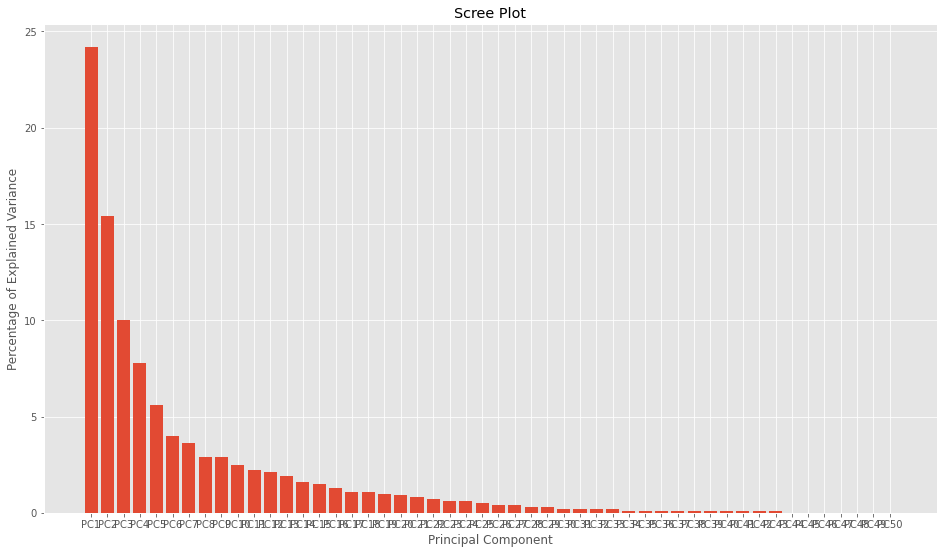

In [259]:
plt.bar(x=range(1, len(per_var_verbs) + 1 ), height = per_var_verbs, tick_label = labels_verbs)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [260]:

#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_verbs_verbs = pd.DataFrame(pca_data_verbs, index = verbs_dataset_10_10inst.columns , columns = labels_verbs)

In [261]:
# Loading scores for PC1

loading_scores_verbs  = pd.Series(pca_verbs.components_[0], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC1_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC1_df_verbs = PC1_loading_scores_verbs.to_frame()
PC1_df_verbs = PC1_df_verbs.rename(columns={0: 'Col_1'})
PC1_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_verbs  = pd.Series(pca_verbs.components_[1], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC2_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC2_df_verbs = PC2_loading_scores_verbs.to_frame()
PC2_df_verbs = PC2_df_verbs.rename(columns={0: 'Col_1'})
PC2_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_verbs  = pd.Series(pca_verbs.components_[2], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC3_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

##############

PC3_df_verbs = PC3_loading_scores_verbs.to_frame()
PC3_df_verbs = PC3_df_verbs.rename(columns={0: 'Col_1'})
PC3_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC4


loading_scores_verbs  = pd.Series(pca_verbs.components_[3], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC4_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

##############

PC4_df_verbs = PC4_loading_scores_verbs.to_frame()
PC4_df_verbs = PC4_df_verbs.rename(columns={0: 'Col_1'})
PC4_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_verbs  = pd.Series(pca_verbs.components_[4], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC5_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC5_df_verbs = PC5_loading_scores_verbs.to_frame()
PC5_df_verbs = PC5_df_verbs.rename(columns={0: 'Col_1'})
PC5_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC6

loading_scores_verbs  = pd.Series(pca_verbs.components_[5], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC6_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC6_df_verbs = PC6_loading_scores_verbs.to_frame()
PC6_df_verbs = PC6_df_verbs.rename(columns={0: 'Col_1'})
PC6_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC7

loading_scores_verbs  = pd.Series(pca_verbs.components_[6], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC7_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC7_df_verbs = PC7_loading_scores_verbs.to_frame()
PC7_df_verbs = PC7_df_verbs.rename(columns={0: 'Col_1'})
PC7_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC8


loading_scores_verbs  = pd.Series(pca_verbs.components_[7], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC8_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC8_df_verbs = PC8_loading_scores_verbs.to_frame()
PC8_df_verbs = PC8_df_verbs.rename(columns={0: 'Col_1'})
PC8_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC9


loading_scores_verbs  = pd.Series(pca_verbs.components_[8], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC9_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]


PC9_df_verbs = PC9_loading_scores_verbs.to_frame()
PC9_df_verbs = PC9_df_verbs.rename(columns={0: 'Col_1'})
PC9_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC10


loading_scores_verbs  = pd.Series(pca_verbs.components_[9], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC10_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC10_df_verbs = PC10_loading_scores_verbs.to_frame()
PC10_df_verbs = PC10_df_verbs.rename(columns={0: 'Col_1'})
PC10_df_verbs.reset_index(level=0, inplace=True)





In [262]:
PCA_10components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs).append(PC7_df_verbs).append(PC8_df_verbs).append(PC9_df_verbs).append(PC10_df_verbs)

dic = {}
for i in range(100):
    x = list(PCA_10components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

{'feature_850': 1,
 'feature_852': 1,
 'feature_925': 1,
 'feature_854': 1,
 'feature_773': 1,
 'feature_856': 1,
 'feature_1136': 1,
 'feature_1061': 1,
 'feature_986': 1,
 'feature_1211': 1,
 'feature_572': 1,
 'feature_568': 1,
 'feature_571': 1,
 'feature_567': 1,
 'feature_576': 1,
 'feature_564': 1,
 'feature_575': 1,
 'feature_573': 1,
 'feature_569': 1,
 'feature_577': 1,
 'feature_436': 1,
 'feature_437': 1,
 'feature_435': 1,
 'feature_443': 1,
 'feature_439': 1,
 'feature_444': 1,
 'feature_440': 1,
 'feature_448': 1,
 'feature_447': 1,
 'feature_449': 1,
 'feature_308': 1,
 'feature_233': 1,
 'feature_6': 1,
 'feature_5': 1,
 'feature_383': 1,
 'feature_83': 1,
 'feature_158': 1,
 'feature_81': 1,
 'feature_231': 1,
 'feature_306': 1,
 'feature_974': 1,
 'feature_973': 1,
 'feature_972': 1,
 'feature_970': 1,
 'feature_969': 1,
 'feature_968': 1,
 'feature_971': 1,
 'feature_966': 1,
 'feature_965': 1,
 'feature_964': 1,
 'feature_149': 1,
 'feature_148': 1,
 'feature_147':

In [263]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

In [264]:
projection_verbs = pca_verbs.transform(X=new_verbs_dataset_10_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50'
    ],
    index   = new_verbs_dataset_10_10inst.index
)
projection_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-14.880869,4.804905,-6.990112,-7.533893,-5.094380,5.152426,-4.402979,-0.643595,-3.547542,3.089371,...,-1.306810,0.339869,-0.012698,-0.184292,-0.114924,0.770939,1.667496,-0.598369,-0.853642,0.015368
1,-18.069004,4.853810,-7.177989,-6.568529,-7.507598,4.742999,-4.347762,0.301370,-1.437618,3.355631,...,-0.121076,-0.014798,0.050066,0.013130,-0.082258,1.089059,1.591680,-0.349768,-0.750209,-0.072117
2,-13.837848,4.943998,-6.459906,-6.851889,-5.353092,4.720851,-3.955372,-0.974229,-5.674731,0.851718,...,-0.812393,0.187603,-0.134110,-0.247585,-0.132064,0.686754,1.609131,-0.700184,-0.923709,-0.031909
3,-13.123515,5.336302,-3.273254,-6.030144,-4.218045,5.827762,-1.039889,2.397495,-3.348923,1.397524,...,-1.312548,0.256542,0.555035,-0.159744,-0.079126,0.903499,1.706365,-0.517391,-0.888784,0.025082
4,-18.212103,2.000473,-9.524664,-7.281181,-6.617124,2.414819,-2.703339,0.797043,-2.570609,2.409619,...,-0.807384,0.331501,0.253503,-0.179027,0.038742,1.186897,1.683421,-0.244362,-0.803399,0.005309


In [265]:
PC6_10_10inst_verbs = projection_verbs.iloc[:,0:6]
PC6_10_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-14.880869,4.804905,-6.990112,-7.533893,-5.094380,5.152426
1,-18.069004,4.853810,-7.177989,-6.568529,-7.507598,4.742999
2,-13.837848,4.943998,-6.459906,-6.851889,-5.353092,4.720851
3,-13.123515,5.336302,-3.273254,-6.030144,-4.218045,5.827762
4,-18.212103,2.000473,-9.524664,-7.281181,-6.617124,2.414819


In [266]:
PC6_10_10inst_verbs.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89'],True)

In [267]:
PC6_10_10inst_verbs['classes'] = PC6_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [268]:
PC6_10_10inst_verbs.drop("instance", axis=1, inplace=True)

PC6_10_10inst_verbs.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,-14.880869,4.804905,-6.990112,-7.533893,-5.094380,5.152426,aprender
1,-18.069004,4.853810,-7.177989,-6.568529,-7.507598,4.742999,aprender
2,-13.837848,4.943998,-6.459906,-6.851889,-5.353092,4.720851,aprender
3,-13.123515,5.336302,-3.273254,-6.030144,-4.218045,5.827762,aprender
4,-18.212103,2.000473,-9.524664,-7.281181,-6.617124,2.414819,aprender


In [269]:
print(pd.unique(PC6_10_10inst_verbs['classes']))

X_PC6_10_10inst_verbs= PC6_10_10inst_verbs.iloc[:,:-1].values
y_PC6_10_10inst_verbs=  PC6_10_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'decir' 'pensar' 'sentir']


In [270]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_verbs== Labelencoder_Y.fit_transform(y_PC6_10_10inst_verbs)
y_PC6_10_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'decir', 'decir', 'decir', 'decir',
       'decir', 'decir', 'decir', 'decir', 'decir', 'decir', 'pensar',
       'pensar', 'pensar', 'pensar', 'pensar', 'pensar', 'pensar',
       'pensar', 'pensar', 'pensar', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir'], dtype=object)

In [271]:
X_train_PC6_10_10inst_verbs, X_test_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs = train_test_split(X_PC6_10_10inst_verbs, y_PC6_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_verbs = scaler.fit_transform(X_train_PC6_10_10inst_verbs)
X_test_PC6_10_10inst_verbs = scaler.transform(X_test_PC6_10_10inst_verbs)

([<matplotlib.axis.XTick at 0x143cdac7608>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

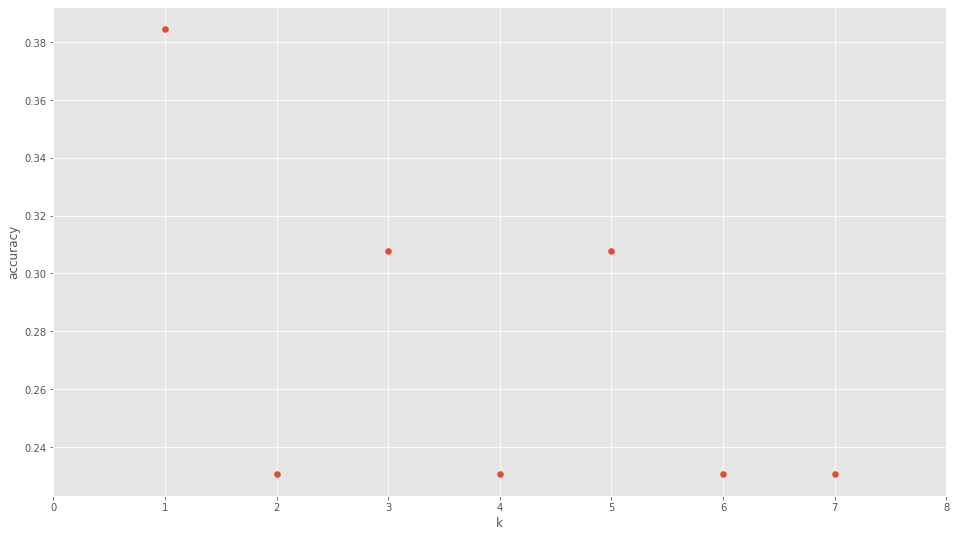

In [272]:
k_range_PC6_10_10inst_verbs = range(1, 8)
scores_PC6_10_10inst_verbs = []
for k in k_range_PC6_10_10inst_verbs:
    knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
    scores_PC6_10_10inst_verbs.append(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_verbs, scores_PC6_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.38


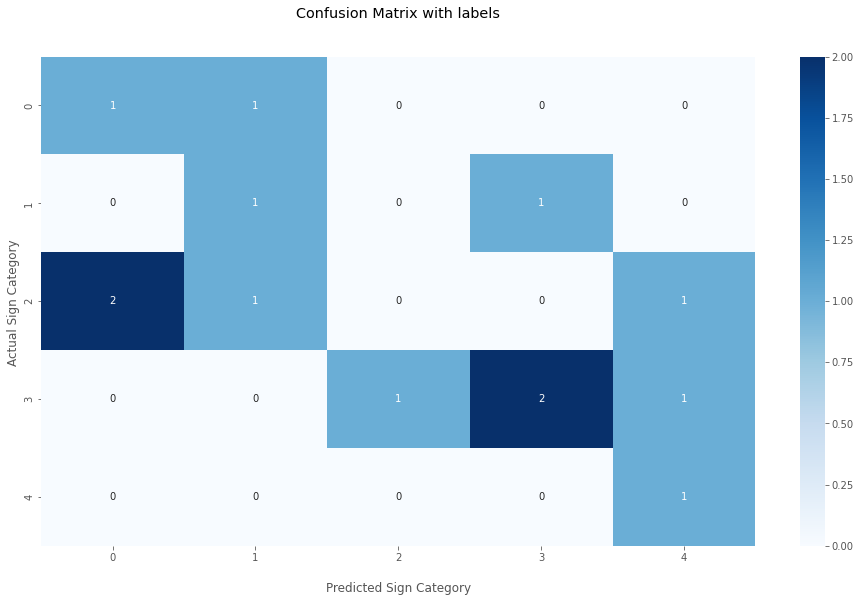

In [273]:
n_neighbors_PC6_10_10inst_verbs = 1
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.23


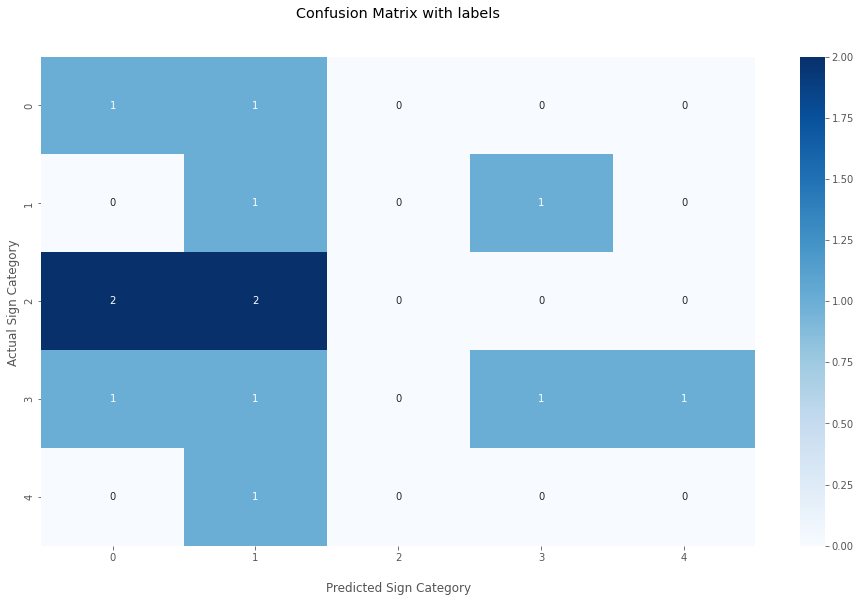

In [274]:
n_neighbors_PC6_10_10inst_verbs = 2
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.31


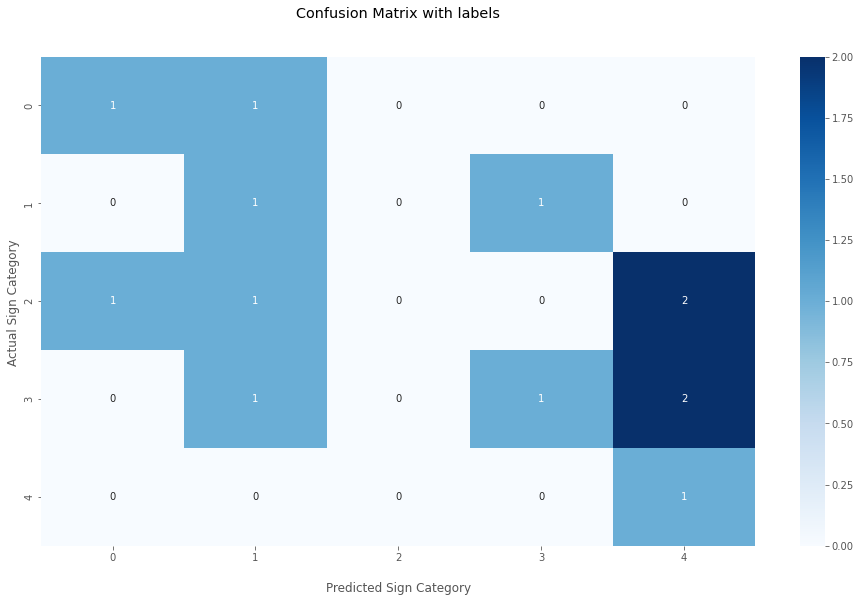

In [275]:
n_neighbors_PC6_10_10inst_verbs = 3
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.59
Accuracy of K-NN classifier on test set: 0.31


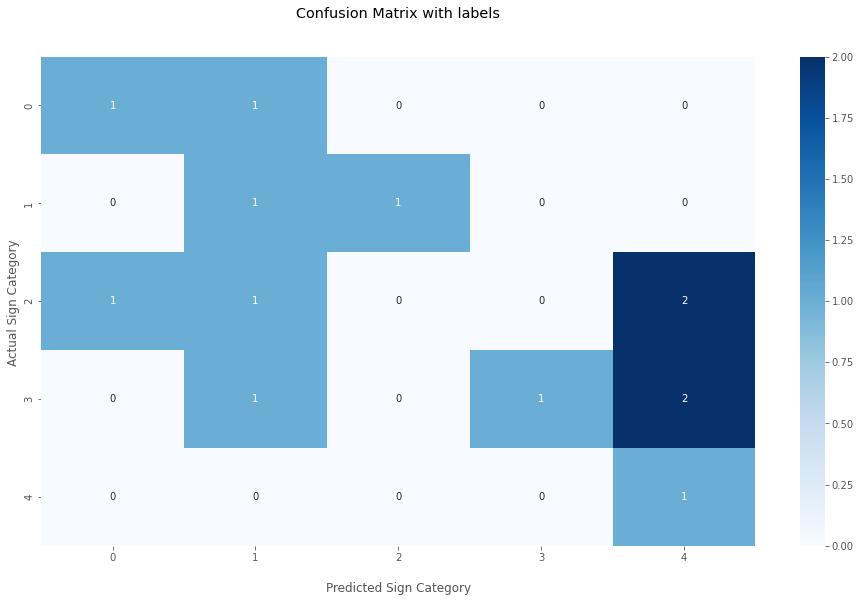

In [276]:
n_neighbors_PC6_10_10inst_verbs = 5
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [277]:
PCA_6components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs)

dic = {}
for i in range(60):
    x = list(PCA_6components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
dic

{'feature_850': 1,
 'feature_852': 1,
 'feature_925': 1,
 'feature_854': 1,
 'feature_773': 1,
 'feature_856': 1,
 'feature_1136': 1,
 'feature_1061': 1,
 'feature_986': 1,
 'feature_1211': 1,
 'feature_572': 1,
 'feature_568': 1,
 'feature_571': 1,
 'feature_567': 1,
 'feature_576': 1,
 'feature_564': 1,
 'feature_575': 1,
 'feature_573': 1,
 'feature_569': 1,
 'feature_577': 1,
 'feature_436': 1,
 'feature_437': 1,
 'feature_435': 1,
 'feature_443': 1,
 'feature_439': 1,
 'feature_444': 1,
 'feature_440': 1,
 'feature_448': 1,
 'feature_447': 1,
 'feature_449': 1,
 'feature_308': 1,
 'feature_233': 1,
 'feature_6': 1,
 'feature_5': 1,
 'feature_383': 1,
 'feature_83': 1,
 'feature_158': 1,
 'feature_81': 1,
 'feature_231': 1,
 'feature_306': 1,
 'feature_974': 1,
 'feature_973': 1,
 'feature_972': 1,
 'feature_970': 1,
 'feature_969': 1,
 'feature_968': 1,
 'feature_971': 1,
 'feature_966': 1,
 'feature_965': 1,
 'feature_964': 1,
 'feature_149': 1,
 'feature_148': 1,
 'feature_147':

In [278]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################

projection_verbs = pca_verbs.transform(X=new_verbs_dataset_10_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50'
   
    ],
    index   = new_verbs_dataset_10_10inst.index
)
projection_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-14.880869,4.804905,-6.990112,-7.533893,-5.094380,5.152426,-4.402979,-0.643595,-3.547542,3.089371,...,-1.306810,0.339869,-0.012698,-0.184292,-0.114924,0.770939,1.667496,-0.598369,-0.853642,0.015368
1,-18.069004,4.853810,-7.177989,-6.568529,-7.507598,4.742999,-4.347762,0.301370,-1.437618,3.355631,...,-0.121076,-0.014798,0.050066,0.013130,-0.082258,1.089059,1.591680,-0.349768,-0.750209,-0.072117
2,-13.837848,4.943998,-6.459906,-6.851889,-5.353092,4.720851,-3.955372,-0.974229,-5.674731,0.851718,...,-0.812393,0.187603,-0.134110,-0.247585,-0.132064,0.686754,1.609131,-0.700184,-0.923709,-0.031909
3,-13.123515,5.336302,-3.273254,-6.030144,-4.218045,5.827762,-1.039889,2.397495,-3.348923,1.397524,...,-1.312548,0.256542,0.555035,-0.159744,-0.079126,0.903499,1.706365,-0.517391,-0.888784,0.025082
4,-18.212103,2.000473,-9.524664,-7.281181,-6.617124,2.414819,-2.703339,0.797043,-2.570609,2.409619,...,-0.807384,0.331501,0.253503,-0.179027,0.038742,1.186897,1.683421,-0.244362,-0.803399,0.005309


In [279]:
PC10_10_10inst_verbs = projection_verbs.iloc[:,0:10]
PC10_10_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-14.880869,4.804905,-6.990112,-7.533893,-5.094380,5.152426,-4.402979,-0.643595,-3.547542,3.089371
1,-18.069004,4.853810,-7.177989,-6.568529,-7.507598,4.742999,-4.347762,0.301370,-1.437618,3.355631
2,-13.837848,4.943998,-6.459906,-6.851889,-5.353092,4.720851,-3.955372,-0.974229,-5.674731,0.851718
3,-13.123515,5.336302,-3.273254,-6.030144,-4.218045,5.827762,-1.039889,2.397495,-3.348923,1.397524
4,-18.212103,2.000473,-9.524664,-7.281181,-6.617124,2.414819,-2.703339,0.797043,-2.570609,2.409619


In [280]:
PC10_10_10inst_verbs.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89'],True)

In [281]:
PC10_10_10inst_verbs['classes'] = PC10_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [282]:
PC10_10_10inst_verbs.drop("instance", axis=1, inplace=True)

PC10_10_10inst_verbs.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,-14.880869,4.804905,-6.990112,-7.533893,-5.094380,5.152426,-4.402979,-0.643595,-3.547542,3.089371,aprender
1,-18.069004,4.853810,-7.177989,-6.568529,-7.507598,4.742999,-4.347762,0.301370,-1.437618,3.355631,aprender
2,-13.837848,4.943998,-6.459906,-6.851889,-5.353092,4.720851,-3.955372,-0.974229,-5.674731,0.851718,aprender
3,-13.123515,5.336302,-3.273254,-6.030144,-4.218045,5.827762,-1.039889,2.397495,-3.348923,1.397524,aprender
4,-18.212103,2.000473,-9.524664,-7.281181,-6.617124,2.414819,-2.703339,0.797043,-2.570609,2.409619,aprender


In [283]:
print(pd.unique(PC10_10_10inst_verbs['classes']))

X_PC10_10_10inst_verbs= PC10_10_10inst_verbs.iloc[:,:-1].values
y_PC10_10_10inst_verbs=  PC10_10_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'decir' 'pensar' 'sentir']


In [284]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_verbs== Labelencoder_Y.fit_transform(y_PC10_10_10inst_verbs)
y_PC10_10_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'decir', 'decir', 'decir', 'decir',
       'decir', 'decir', 'decir', 'decir', 'decir', 'decir', 'pensar',
       'pensar', 'pensar', 'pensar', 'pensar', 'pensar', 'pensar',
       'pensar', 'pensar', 'pensar', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir'], dtype=object)

In [285]:
X_train_PC10_10_10inst_verbs, X_test_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs = train_test_split(X_PC10_10_10inst_verbs, y_PC10_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_verbs = scaler.fit_transform(X_train_PC10_10_10inst_verbs)
X_test_PC10_10_10inst_verbs = scaler.transform(X_test_PC10_10_10inst_verbs)

([<matplotlib.axis.XTick at 0x143d07710c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

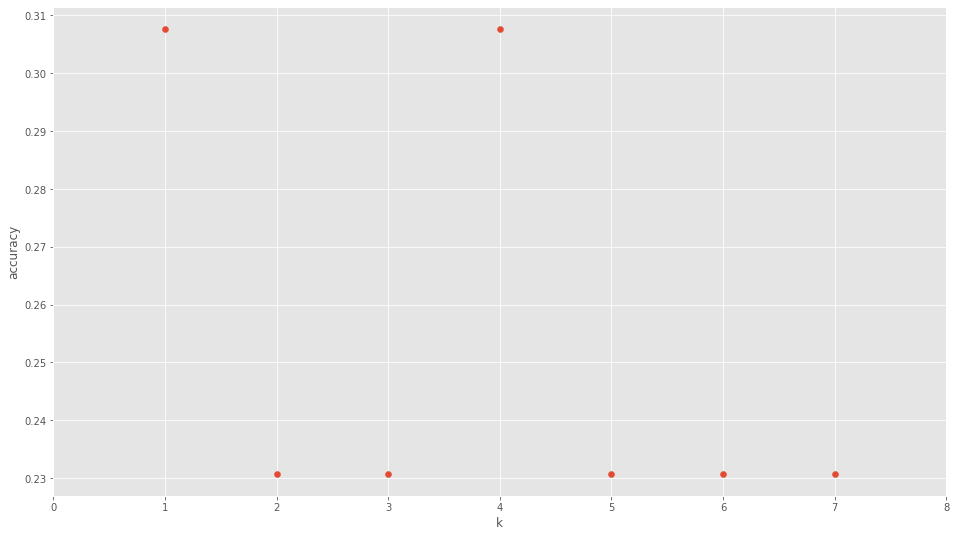

In [286]:
k_range_PC10_10_10inst_verbs = range(1, 8)
scores_PC10_10_10inst_verbs = []
for k in k_range_PC10_10_10inst_verbs:
    knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
    scores_PC10_10_10inst_verbs.append(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_verbs, scores_PC10_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.31


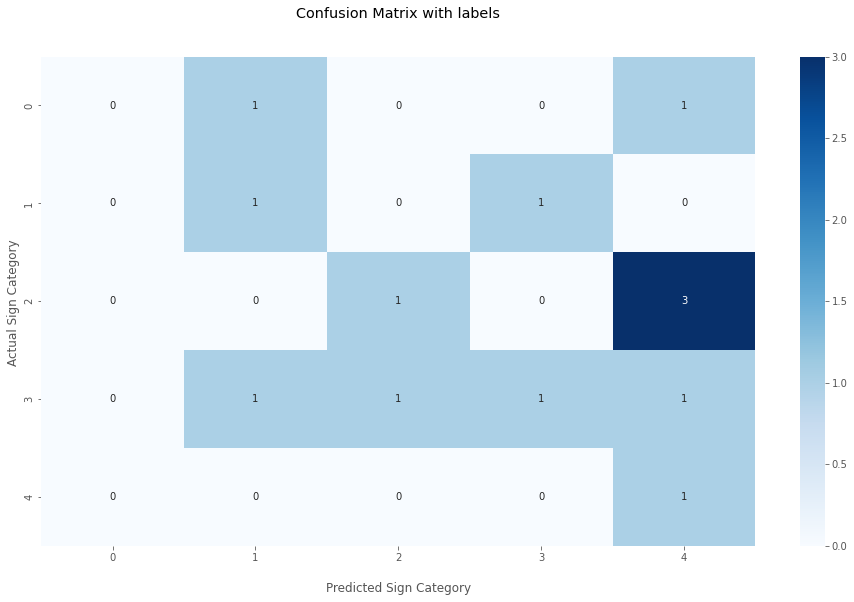

In [287]:
n_neighbors_PC10_10_10inst_verbs = 1
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.23


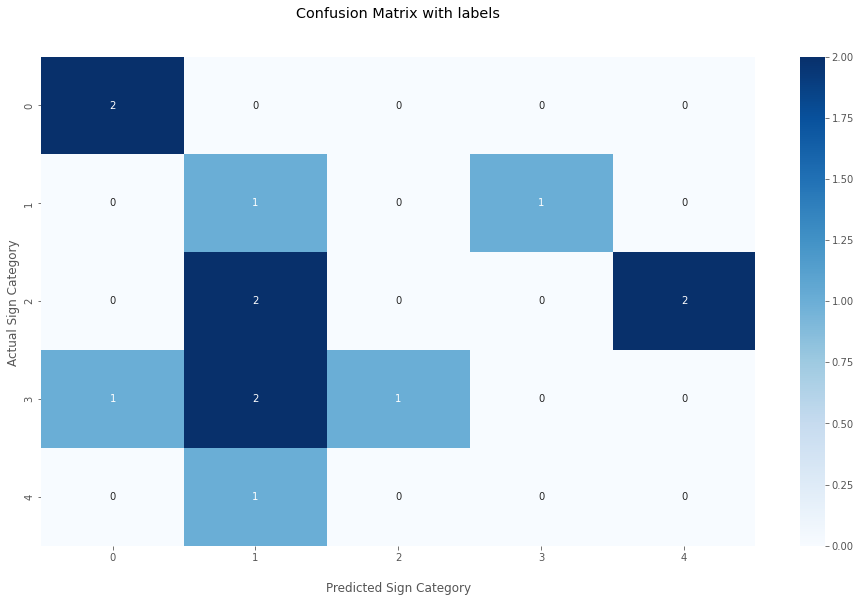

In [288]:
n_neighbors_PC10_10_10inst_verbs = 2
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.23


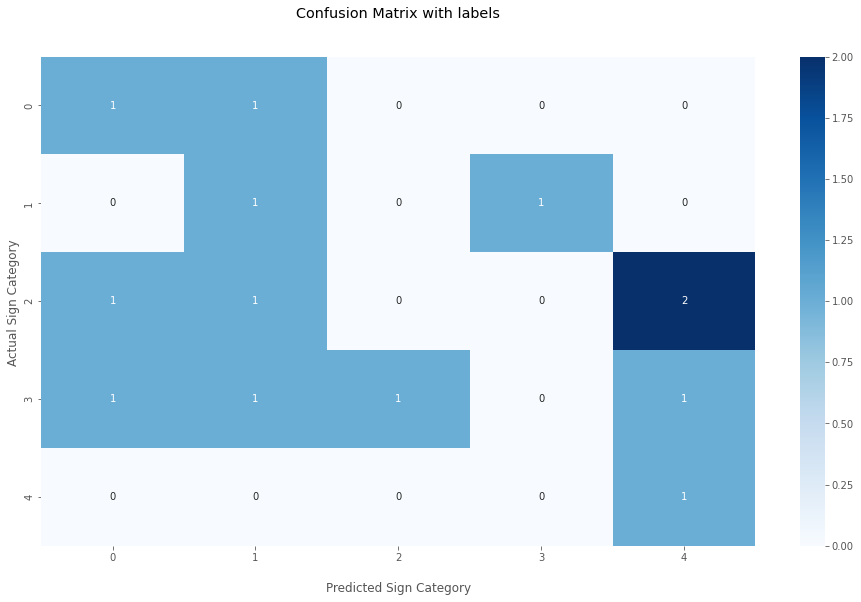

In [289]:
n_neighbors_PC10_10_10inst_verbs = 3
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.23


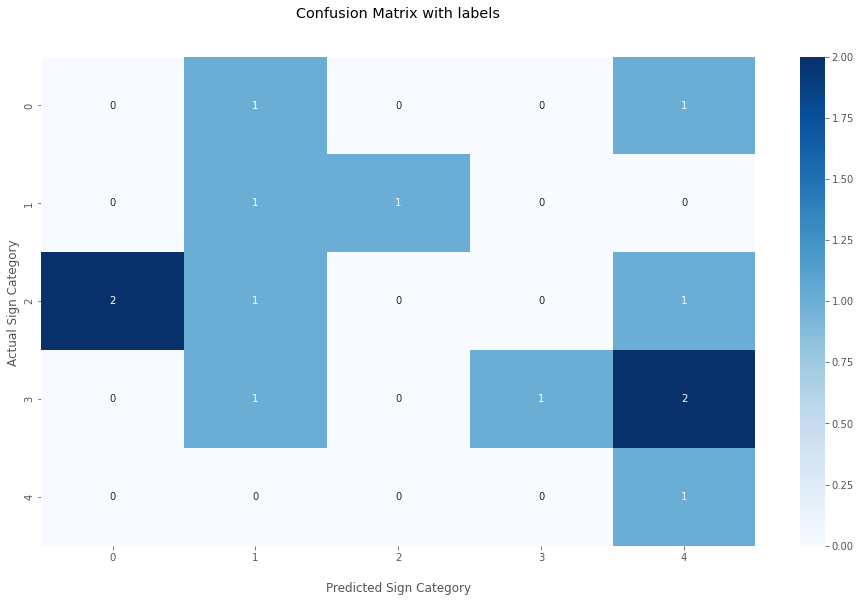

In [290]:
n_neighbors_PC10_10_10inst_verbs = 5
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()